# IPSLCM6_snow_bias_example (xarray, cartopy, xesmf)
Colormaps : https://matplotlib.org/examples/color/colormaps_reference.html

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import xesmf as xe

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

y_start = '1984'
y_end = '2014'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 59 GB / percent used: 52.8 %


## Loading NOAA (2.0x1.75) reference dataset and selecting period

In [2]:
# !ncdump -h '/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'
!ncdump -h 'snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'

netcdf snowc.mon.noaaV2c_185101_201412_2.0x1.75 {
dimensions:
	lat = 94 ;
	lon = 192 ;
	time = UNLIMITED ; // (1968 currently)
	nbnds = 2 ;
variables:
	float lat(lat) ;
		lat:actual_range = 88.542f, -88.542f ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
		lat:axis = "Y" ;
		lat:coordinate_defines = "point" ;
		lat:units = "degree_north" ;
	float lon(lon) ;
		lon:long_name = "Longitude" ;
		lon:actual_range = 0.f, 358.125f ;
		lon:standard_name = "longitude" ;
		lon:axis = "X" ;
		lon:coordinate_defines = "point" ;
		lon:units = "degree_east" ;
	double time_bnds(time, nbnds) ;
		time_bnds:long_name = "Time Boundaries" ;
	double time(time) ;
		time:units = "hours since 1800-1-1 00:00:0.0" ;
		time:avg_period = "0000-01-00 00:00:00" ;
		time:prev_avg_period = "0000-00-01 00:00:00" ;
		time:long_name = "Time" ;
		time:delta_t = "0000-01-00 00:00:00" ;
		time:standard_name = "time" ;
		time:axis = "T" ;
		time:coordinate_defines = "start" ;
		time:actual_range = 447048

In [3]:
# ds = xr.open_dataset('/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc')
ds = xr.open_dataset('snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc')

In [5]:
snowc_mon_noaaV2c = ds.snowc.sel(time=slice(y_start, y_end))
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid


### Display animation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Mat

/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  colorbar.set_clim(artist.get_clim())
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:161: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  colorbar.set_norm(artist.norm)
/home/mlalande/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/raster.py:165: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Mat

:HoloMap   [time]
   :QuadMesh   [lon,lat]   (snowc)
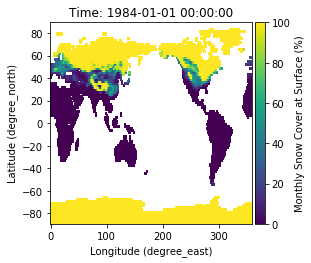
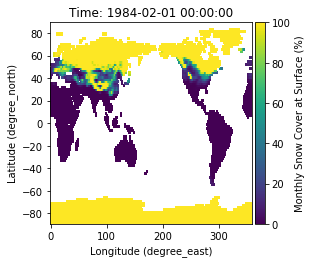
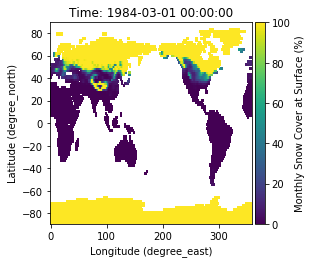
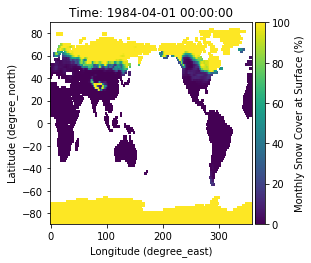
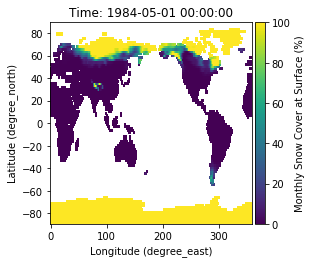
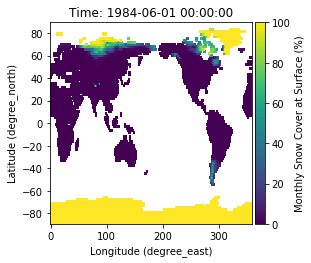
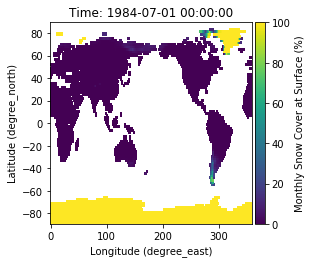
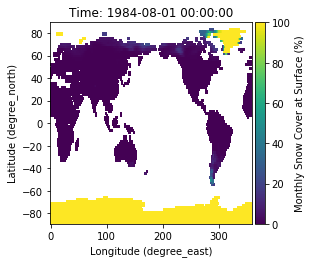
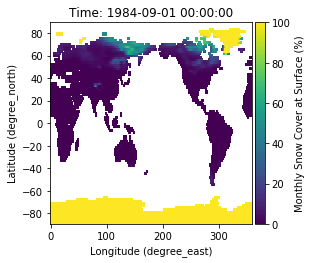
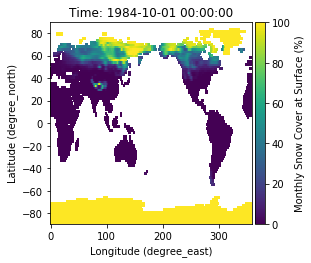
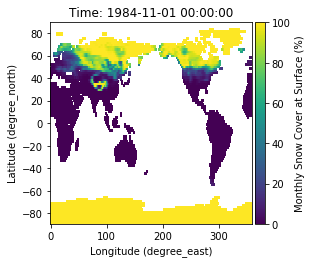
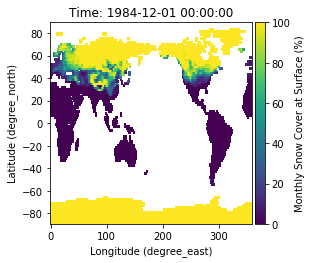
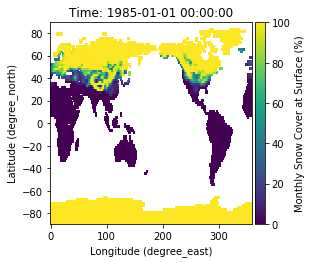
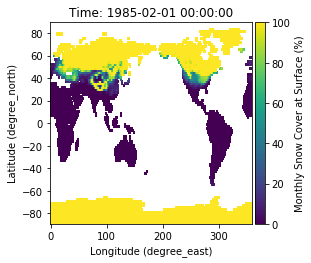
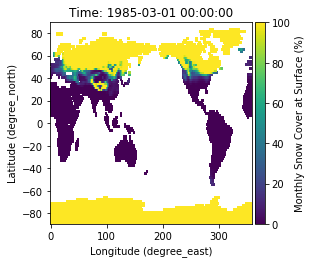
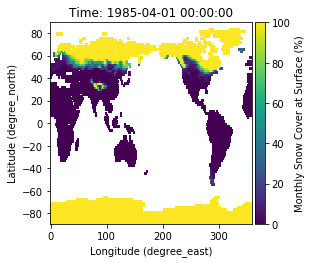
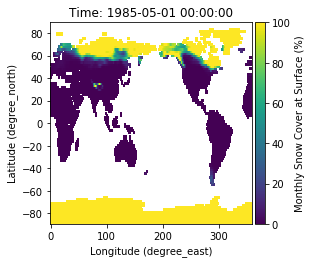
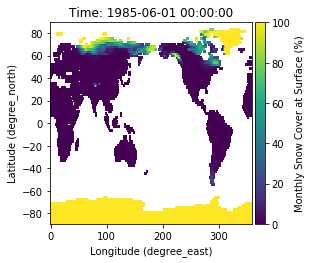
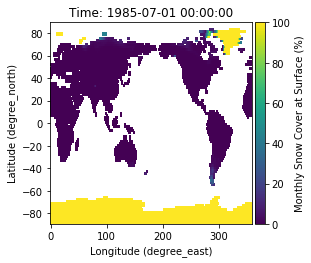
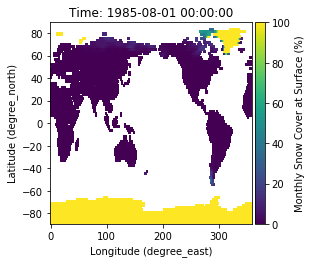

In [6]:
import holoviews as hv
hv.extension('matplotlib')

animation = hv.Dataset(snowc_mon_noaaV2c[:20])
animation.to(hv.QuadMesh, ['lon', 'lat']).options(colorbar=True, cmap='viridis')

In [7]:
%matplotlib notebook

### Compute climatology

In [6]:
snowc_mon_noaaV2c

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid


In [7]:
clim_MA_noaaV2c_not_weighted = snowc_mon_noaaV2c.groupby('time.month').mean('time', keep_attrs=True, skipna=False)\
                                        .sel(month=slice(3,4)).mean('month', keep_attrs=True, skipna=False)
clim_MA_noaaV2c_not_weighted

<xarray.DataArray 'snowc' (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individua

In [8]:
clim_MA_noaaV2c = u.custom_season_clim(snowc_mon_noaaV2c, 'MA', calendar='standard')
clim_MA_noaaV2c

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U2 'MA'
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual

<IPython.core.display.Javascript object>


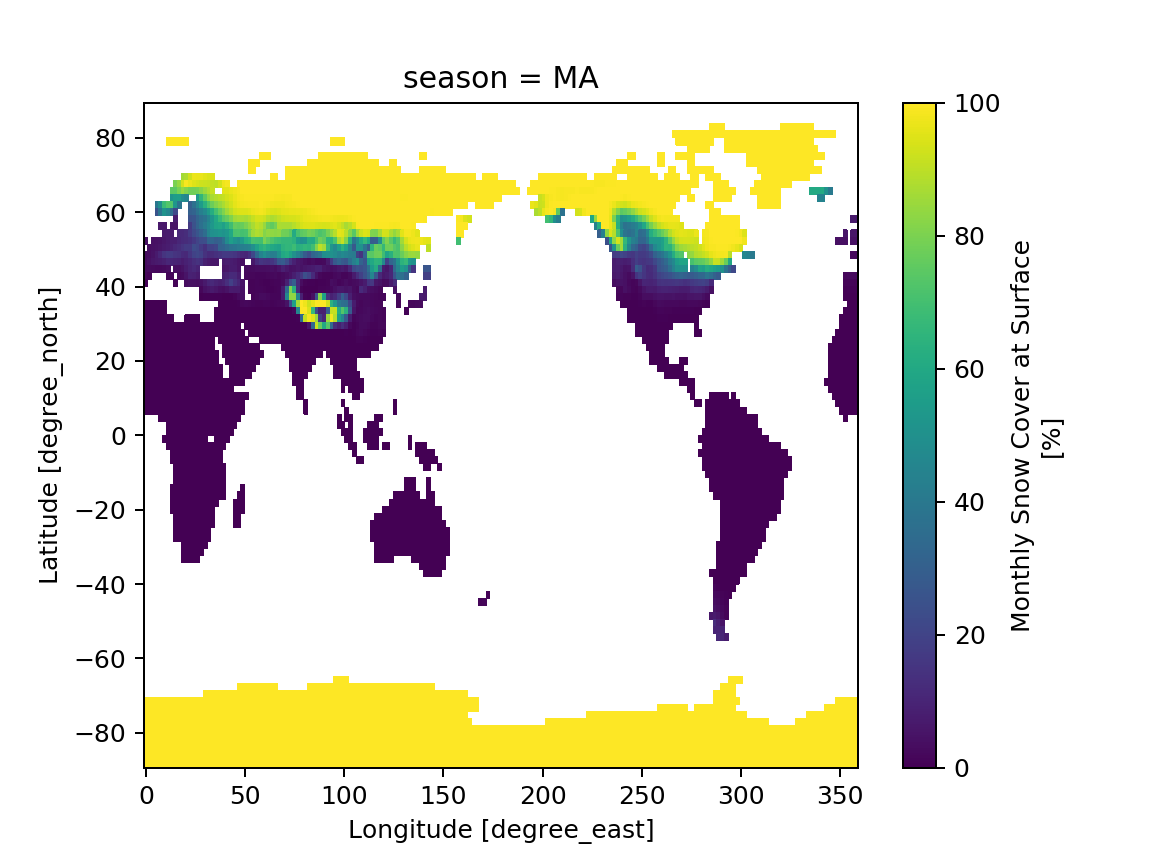

In [9]:
plt.figure()
clim_MA_noaaV2c.plot()

<IPython.core.display.Javascript object>


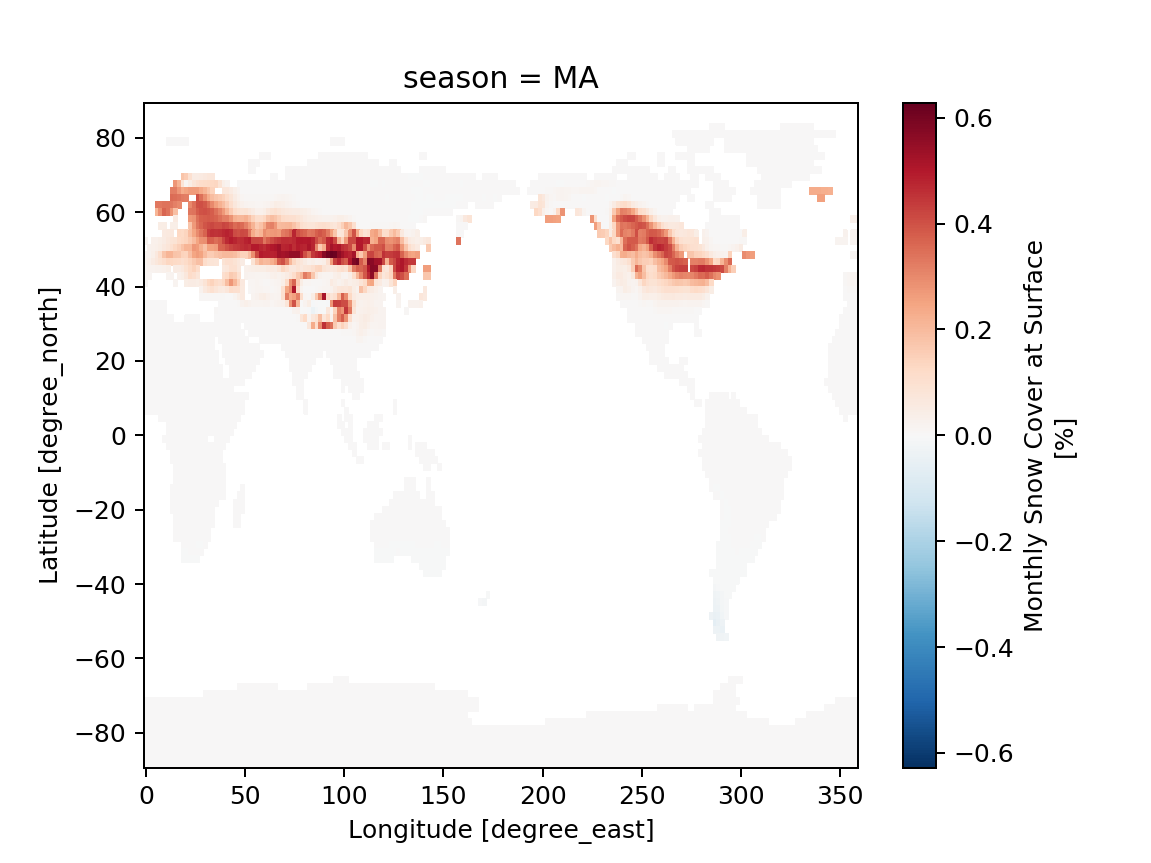

In [14]:
plt.figure()
with xr.set_options(keep_attrs=True):
    diff = clim_MA_noaaV2c - clim_MA_noaaV2c_not_weighted
diff.plot()

About 1% error. Not too bad.

### Advance plot

<IPython.core.display.Javascript object>


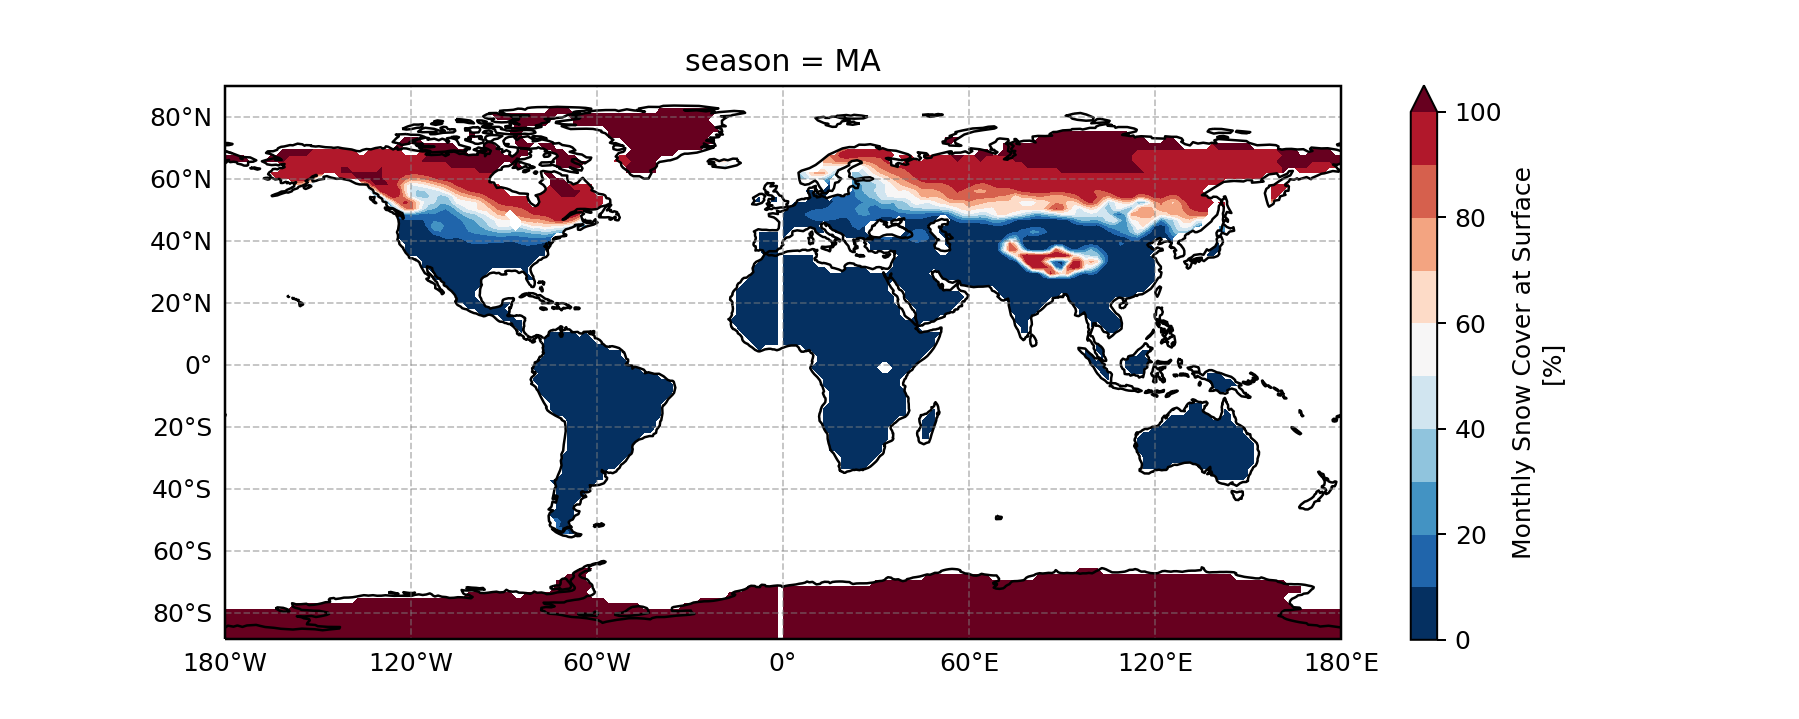

In [10]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

clim_MA_noaaV2c.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [16]:
clim_MA_noaaV2c.max()

<xarray.DataArray ()>
array(100.)
Coordinates:
    season   <U2 'MA'

The maximum value is well 100. The contourf colorbar takes the interval \[90,100[, this explain the extend max.

http://xarray.pydata.org/en/stable/generated/xarray.plot.contourf.html

### Add cyclic point

In [11]:
cyclic_data, cyclic_lons = add_cyclic_point(clim_MA_noaaV2c.values, coord=clim_MA_noaaV2c.lon)

In [12]:
clim_MA_noaaV2c_cyclic = xr.DataArray(
    cyclic_data,
    coords={'lat': clim_MA_noaaV2c.lat, 'lon': cyclic_lons, 'season': clim_MA_noaaV2c.season},
    dims=['lat', 'lon'],
    attrs=clim_MA_noaaV2c.attrs
)

<IPython.core.display.Javascript object>


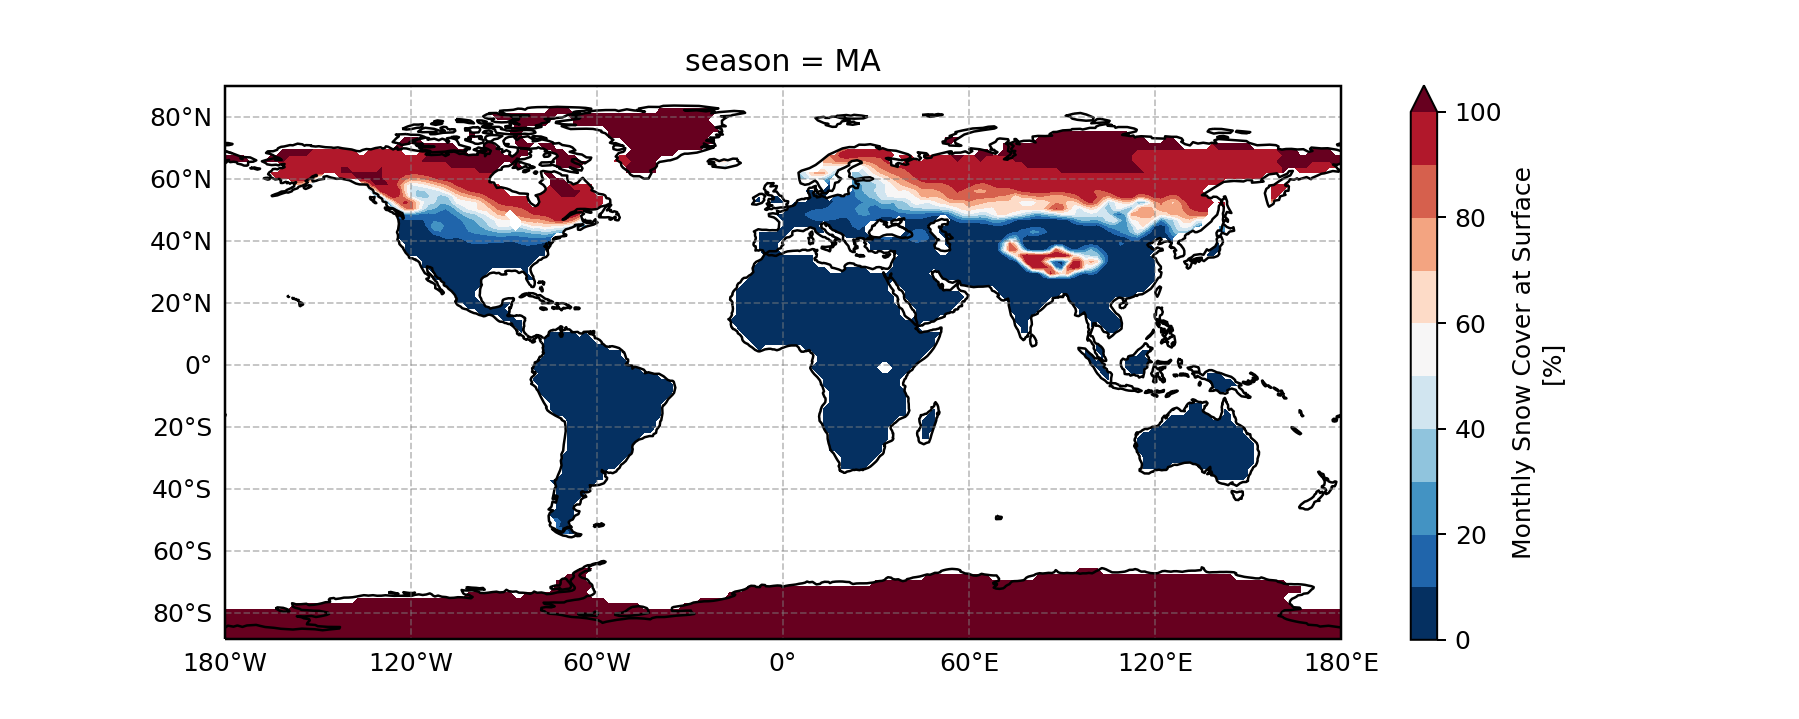

In [13]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

clim_MA_noaaV2c_cyclic.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.savefig('test.pdf', bbox_inches='tight')

### Centered on other longitude

<IPython.core.display.Javascript object>


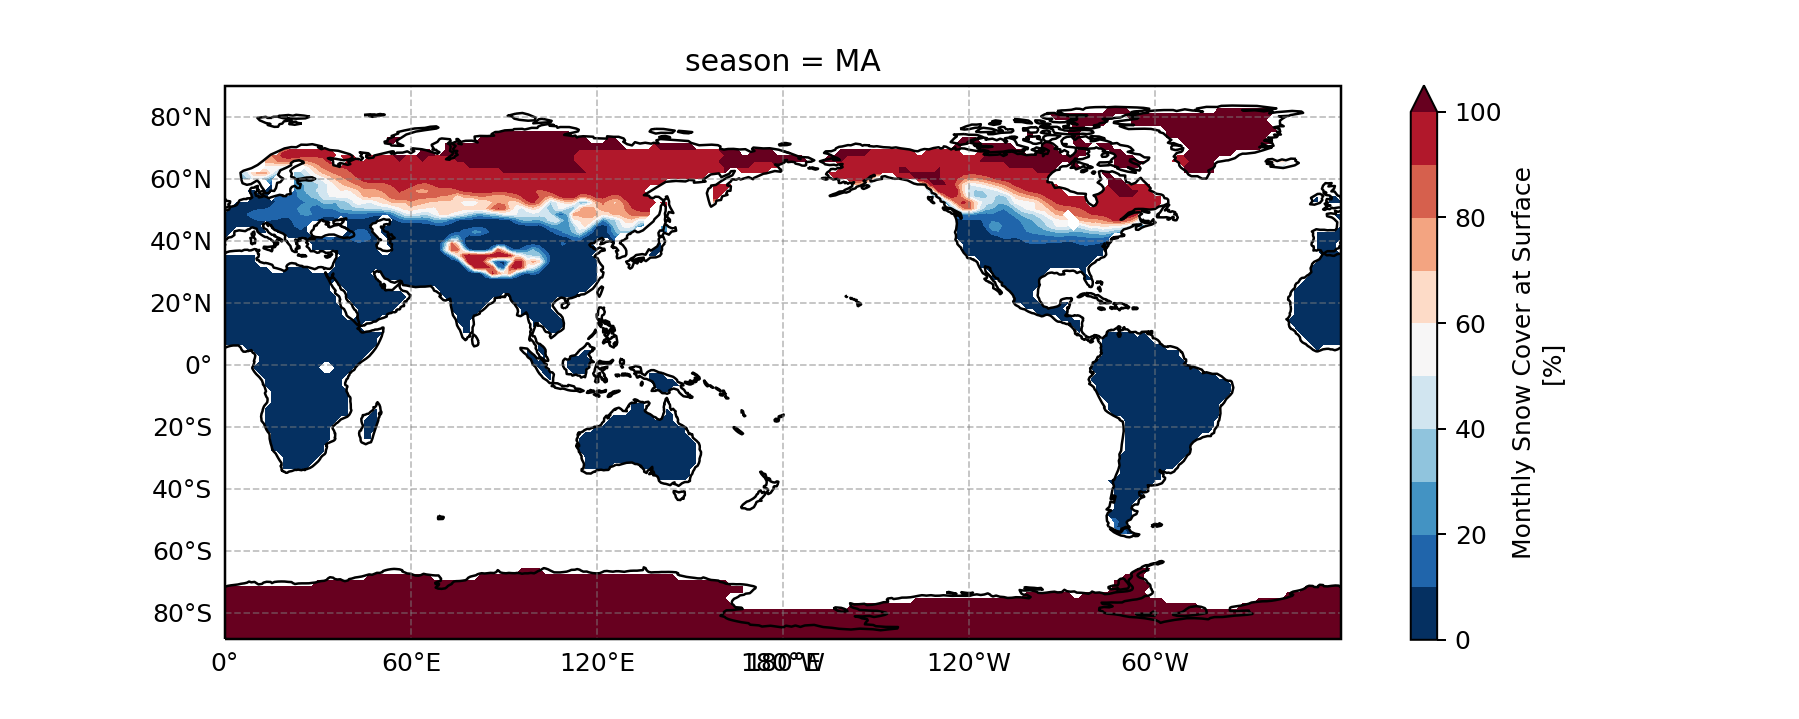

In [14]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_noaaV2c_cyclic.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Overlap of longitude labels. Possible to fix by putting them by hand (a bit tricky).  
-> Longitude overlap labels 180° when central_longitude is not 0 #1401 (https://github.com/SciTools/cartopy/issues/1401)  
Or use ProPlot !!! (promissing new package)

## Loading NCEP/CFSR reanalysis (0.5° x 0.5°)

In [18]:
!ncdump -h '/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc'
# !ncdump -h 'snc_ncarcfsr_1979-2016_0.5x0.5.nc'

netcdf snc_ncarcfsr_1979-2016_0.5x0.5 {
dimensions:
	lon = 720 ;
	lat = 361 ;
	time = UNLIMITED ; // (456 currently)
variables:
	double lon(lon) ;
		lon:axis = "X" ;
		lon:units = "degree_east" ;
	double lat(lat) ;
		lat:axis = "Y" ;
		lat:units = "degree_north" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:units = "seconds since 1970-01-01 00:00:00" ;
		time:calendar = "standard" ;
	double snowc(time, lat, lon) ;
		snowc:units = "%" ;

// global attributes:
		:CDI = "Climate Data Interface version 1.6.4 (http://code.zmaw.de/projects/cdi)" ;
		:Conventions = "CF-1.4" ;
		:CDO = "Climate Data Operators version 1.6.4 (http://code.zmaw.de/projects/cdo)" ;
		:history = "Fri Feb 22 12:18:12 2019: ncatted -a units,lon,m,c,degree_east -a units,lat,m,c,degree_north snc_ncarcfsr_1979-2016_0.5x0.5.nc\nThu Mar 01 12:47:47 2018: cdo mergetime 1979.nc 1980.nc 1981.nc 1982.nc 1983.nc 1984.nc 1985.nc 1986.nc 1987.nc 1988.nc 1989.nc 1990.nc 1991.nc 1992.nc 1993.nc 1994.nc 1995.nc 1996.

In [19]:
file_path = '/home/msantola/TP_CLiMAF/SharedObsSnow/snc_ncarcfsr_1979-2016_0.5x0.5.nc'
# file_path = 'snc_ncarcfsr_1979-2016_0.5x0.5.nc'

ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, time: 456)
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
Data variables:
    snowc    (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...
    history:      Fri Feb 22 12:18:12 2019: ncatted -a units,lon,m,c,degree_e...

In [20]:
snowc_mon_ncar = ds.snowc.sel(time=slice(y_start, y_end))
snowc_mon_ncar

<xarray.DataArray 'snowc' (time: 372, lat: 361, lon: 720)>
[96690240 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    units:    %

In [21]:
snowc_mon_ncar.sel(time='2009-01').where(snowc_mon_ncar<=100)

<xarray.DataArray 'snowc' (time: 1, lat: 361, lon: 720)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.]]])
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    units:    %

<IPython.core.display.Javascript object>


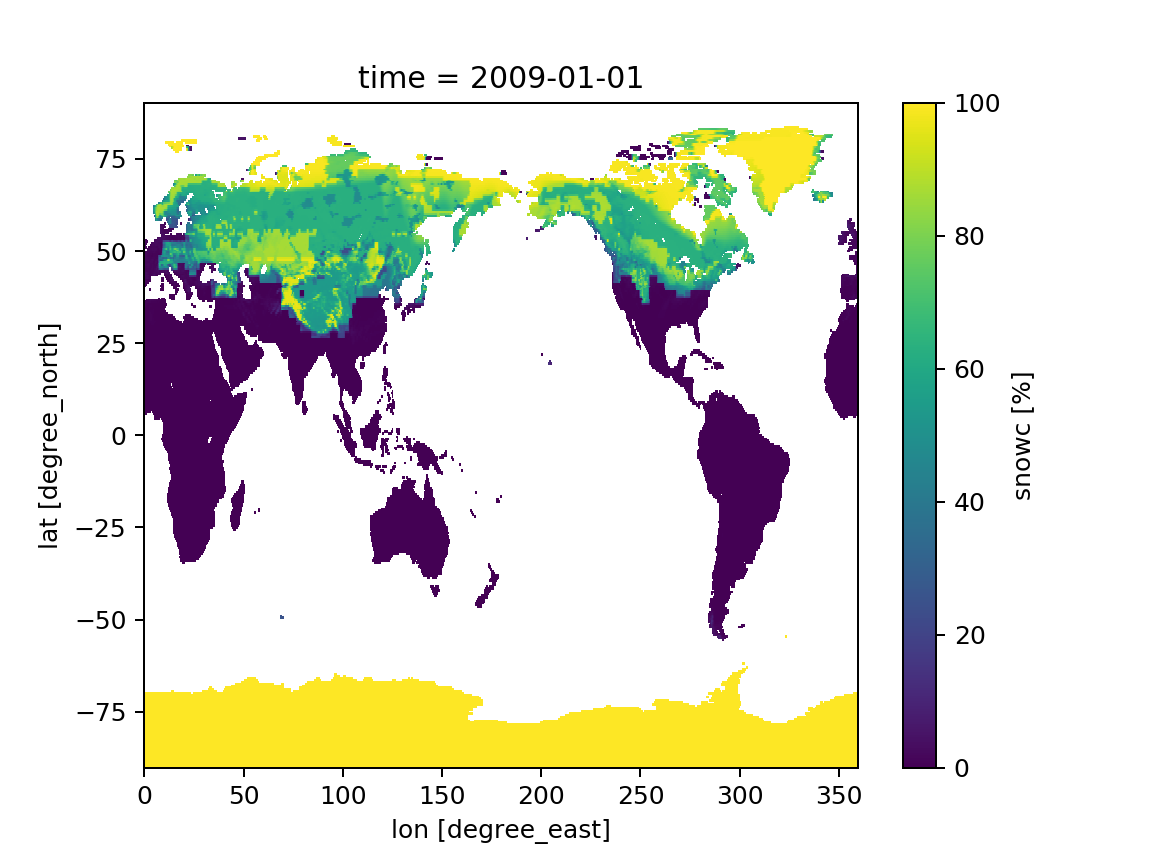

In [22]:
plt.figure()
snowc_mon_ncar.sel(time='2009-01').where(snowc_mon_ncar<=100).plot()

<IPython.core.display.Javascript object>


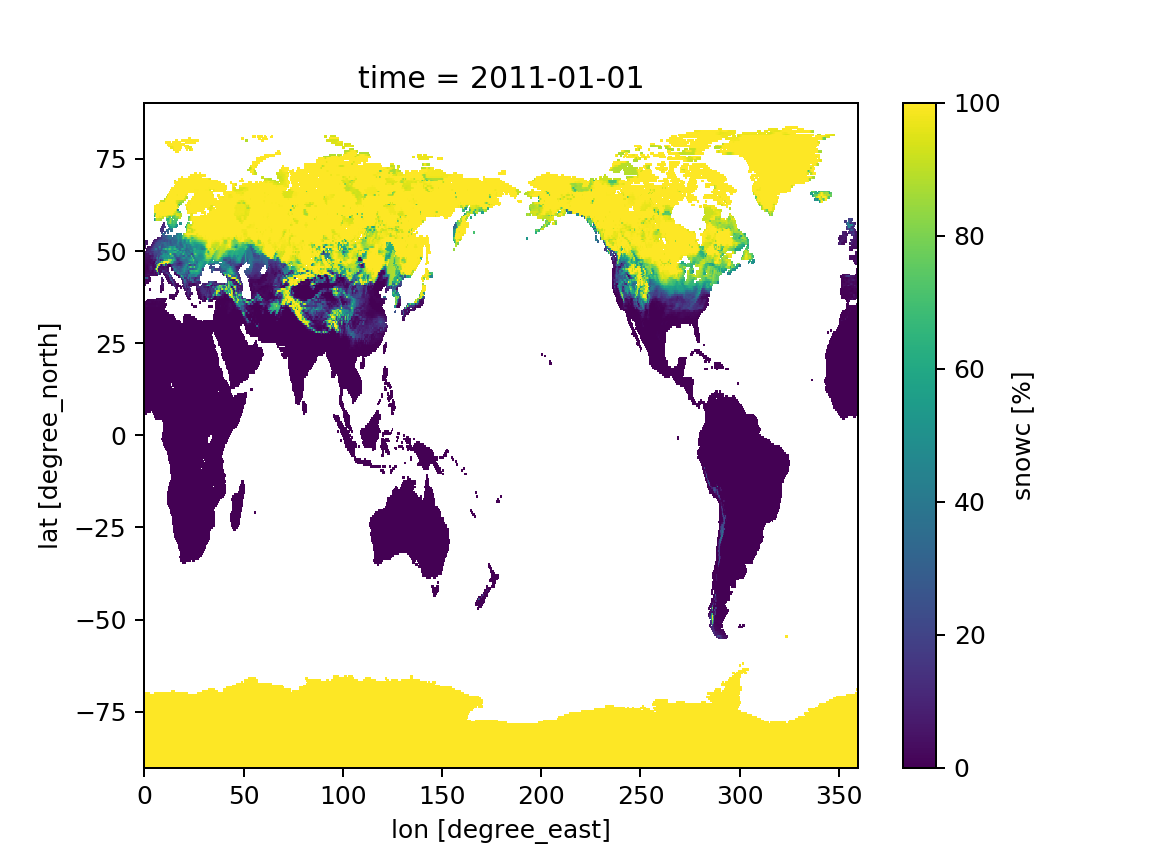

In [23]:
plt.figure()
snowc_mon_ncar.sel(time='2011-01').where(snowc_mon_ncar<=100).plot()

In [24]:
clim_MA_ncar = u.custom_season_clim(snowc_mon_ncar, 'MA', calendar='standard')
clim_MA_ncar

<xarray.DataArray (lat: 361, lon: 720)>
array([[9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       [9999., 9999., 9999., ..., 9999., 9999., 9999.],
       ...,
       [ 100.,  100.,  100., ...,  100.,  100.,  100.],
       [ 100.,  100.,  100., ...,  100.,  100.,  100.],
       [ 100.,  100.,  100., ...,  100.,  100.,  100.]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
    season   <U2 'MA'
Attributes:
    units:    %

<IPython.core.display.Javascript object>


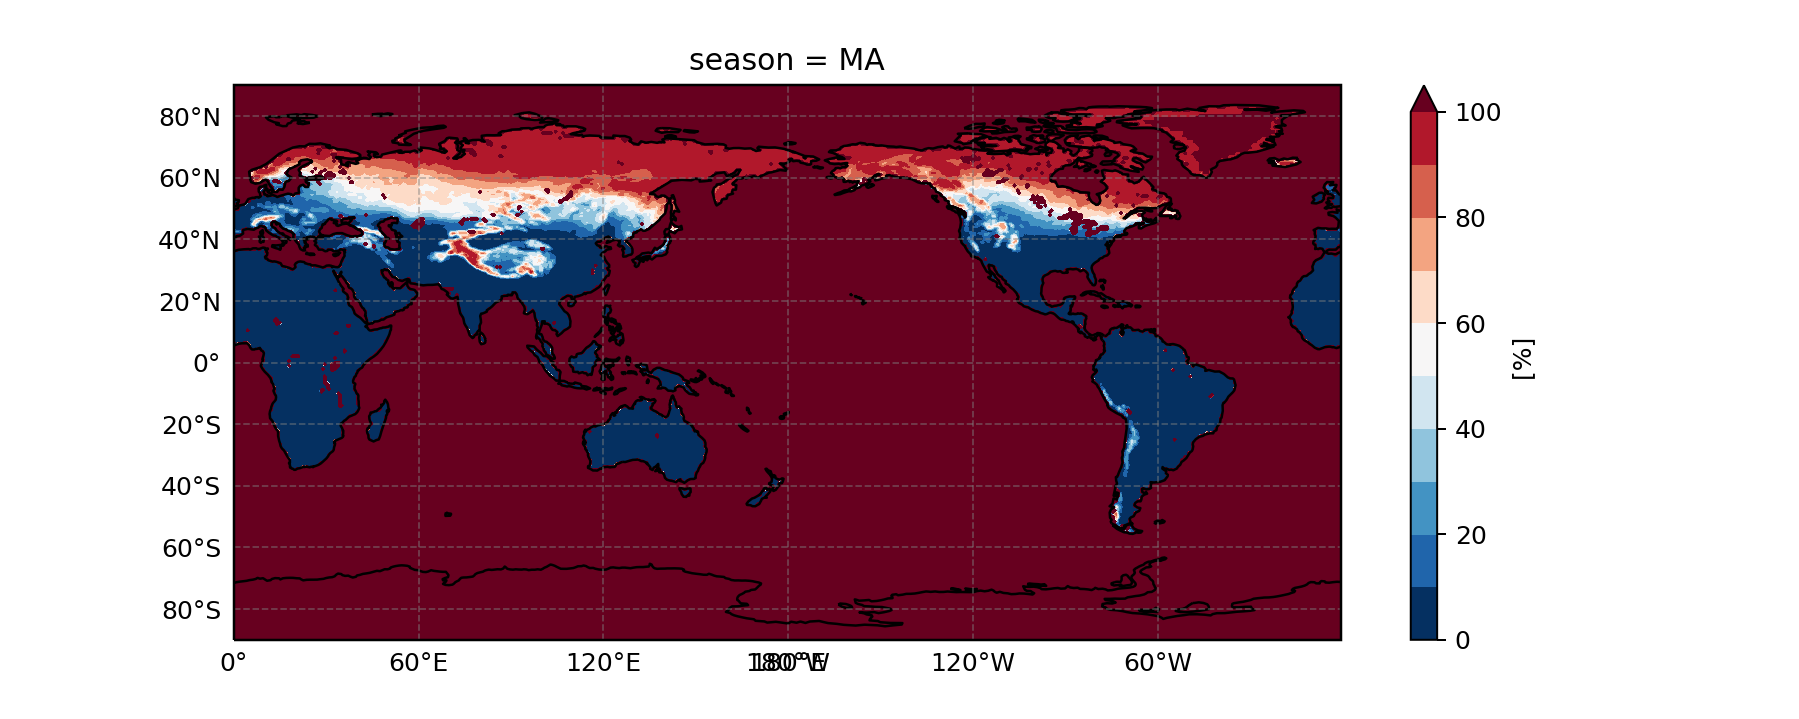

In [25]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_ncar.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [26]:
# Their are many values < 9999.
clim_MA_ncar = clim_MA_ncar.where(clim_MA_ncar<=100)

In [27]:
clim_MA_ncar.max()

<xarray.DataArray ()>
array(99.99999788)
Coordinates:
    season   <U2 'MA'

<IPython.core.display.Javascript object>


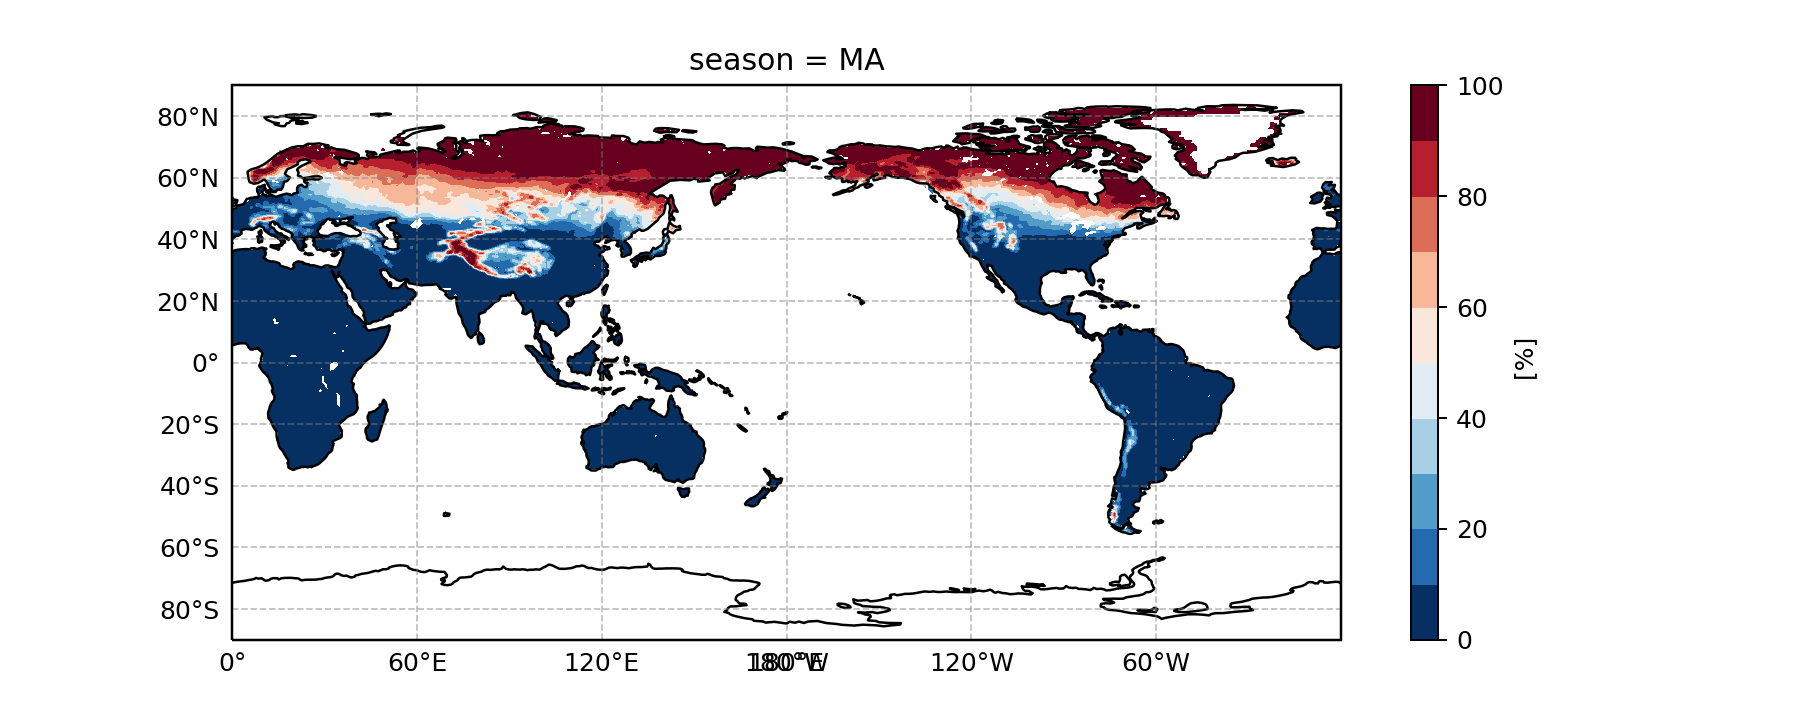

In [28]:
# Values on Greenland and Antartica are >> 100 %, must be missing values?
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_MA_ncar.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
ax.set_global()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Load IPSL-CM6A-LR

In [3]:
# ipsl_path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/'\
#                 +'snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
ipsl_path = 'snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'

snc_ipsl = xr.open_dataset(ipsl_path).snc.sel(time=slice(y_start,y_end))
snc_ipsl

<xarray.DataArray 'snc' (time: 372, lat: 143, lon: 144)>
[7660224 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1984-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

### Compute annual cllimatologies

In [4]:
clim_ipsl = u.clim(snc_ipsl)
clim_ipsl

<xarray.DataArray (lat: 143, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [31]:
clim_obs = u.clim(snowc_mon_ncar)
clim_obs = clim_obs.where(clim_obs<=100)
clim_obs

<xarray.DataArray (lat: 361, lon: 720)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    units:    %

### Regrid the IPSL grid to the NCAR grid

In [32]:
# Think to put periodic=True for periodic data in longitude!
regridder = xe.Regridder(clim_ipsl, clim_obs, 'bilinear', periodic=True)
regridder

Overwrite existing file: bilinear_143x144_361x720_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_143x144_361x720_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (143, 144) 
Output grid shape:          (361, 720) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [33]:
clim_ipsl_regrid = regridder(clim_ipsl, keep_attrs=True)
clim_ipsl_regrid

<xarray.DataArray (lat: 361, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

<IPython.core.display.Javascript object>


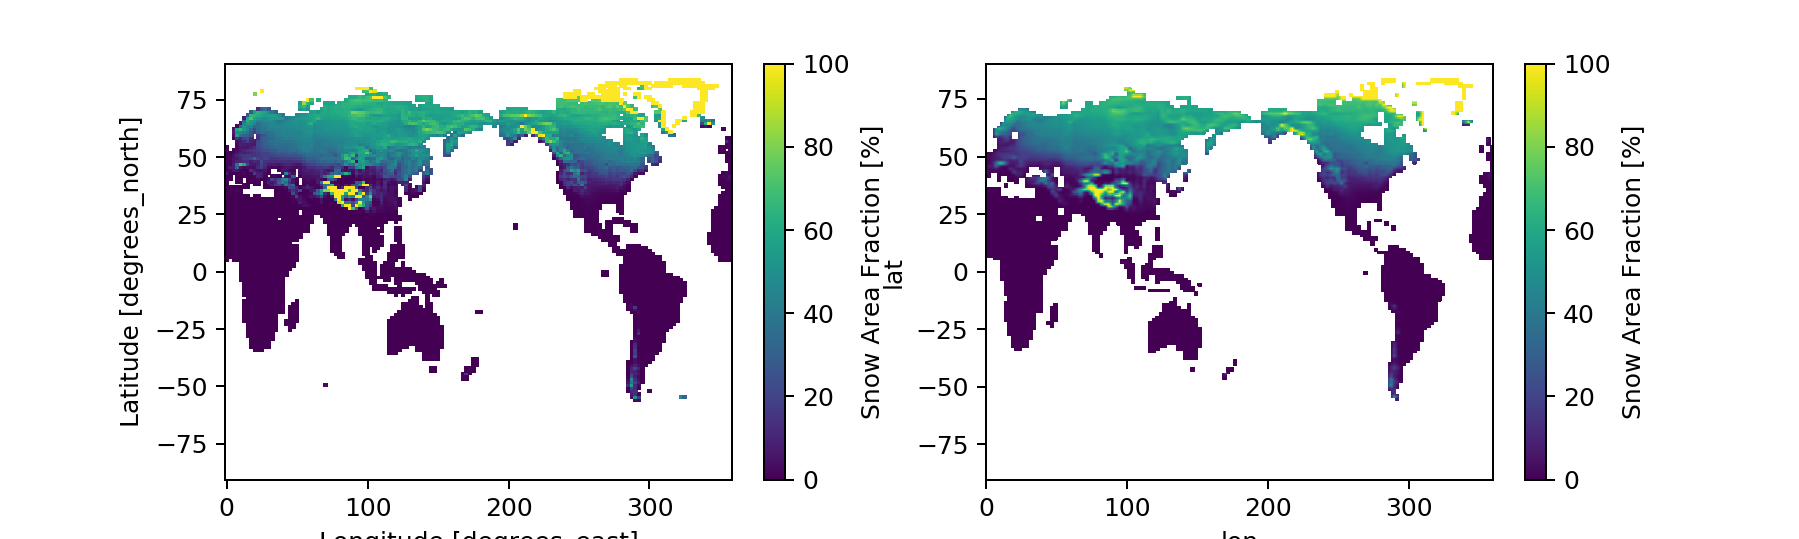

In [34]:
plt.figure(figsize=(10,3))
plt.subplot(121)
clim_ipsl.plot()
plt.subplot(122)
clim_ipsl_regrid.plot()

### Compute the bias

In [35]:
with xr.set_options(keep_attrs=True):
    clim_bias = clim_ipsl_regrid - clim_obs
    
clim_bias

<xarray.DataArray (lat: 361, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
  * lat      (lat) float64 90.0 89.5 89.0 88.5 88.0 ... -88.5 -89.0 -89.5 -90.0
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella
    regrid_method:       bilinear

In [36]:
clim_bias.min()

<xarray.DataArray ()>
array(-68.93281765)

In [37]:
clim_bias.max()

<xarray.DataArray ()>
array(90.31679901)

<IPython.core.display.Javascript object>


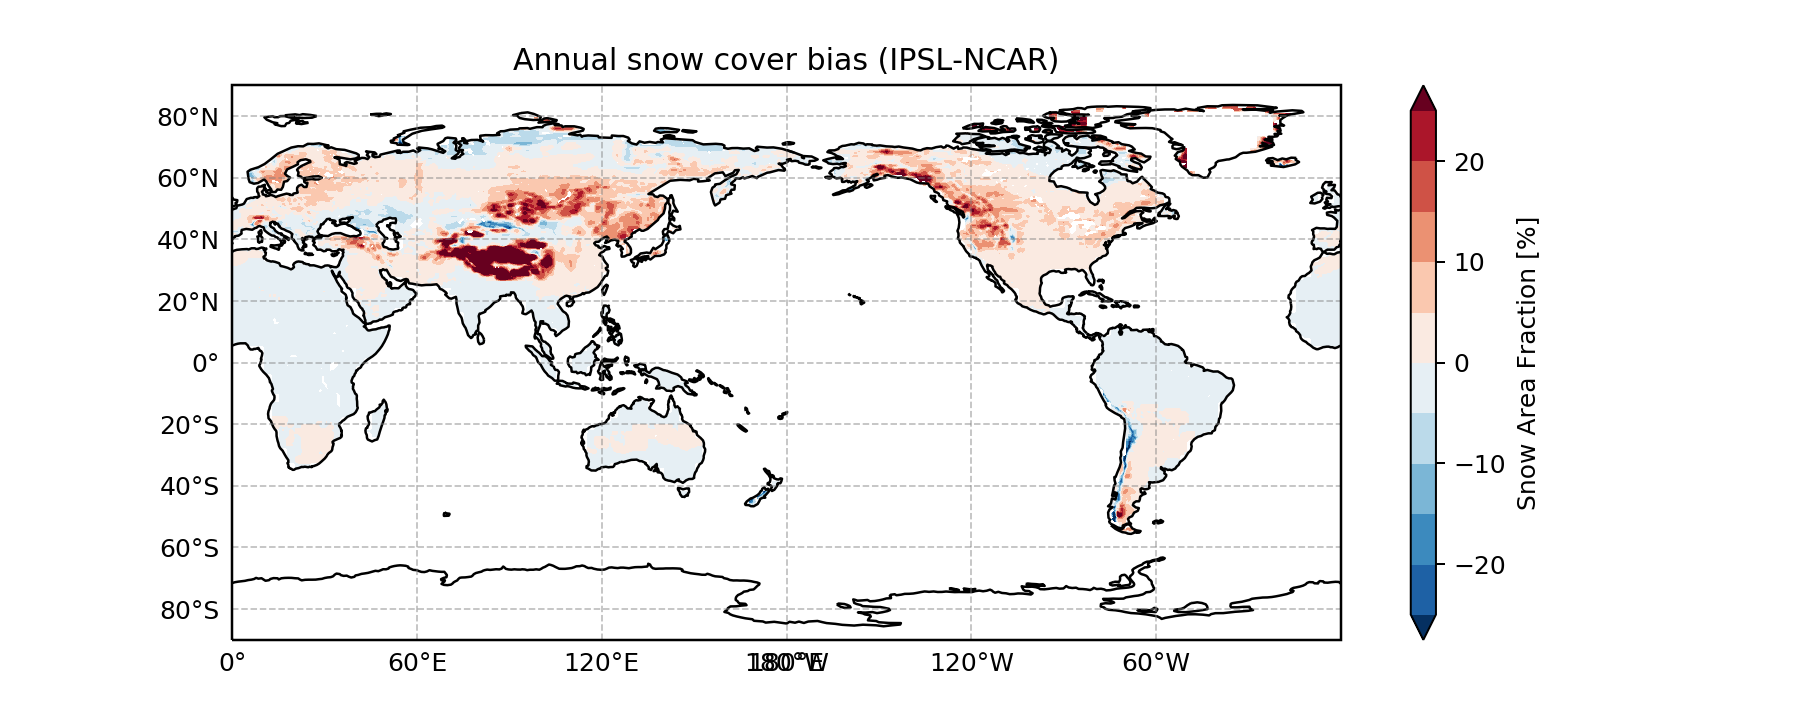

Text(0.5, 1.0, 'Annual snow cover bias (IPSL-NCAR)')

In [38]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

clim_bias.plot.contourf(
    ax=ax, transform=ccrs.PlateCarree(), 
#     robust=True
    levels=np.arange(-25,30,5), 
#     cmap='Spectral_r',
#     cmap='RdYlBu_r',
#     cmap='seismic',
    cmap='RdBu_r',
#     cbar_kwargs={'orientation':'horizontal'}
)

ax.coastlines()
ax.set_global()
# ax.set_aspect('auto')

# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Annual snow cover bias (IPSL-NCAR)')

### Seasonal bias

In [39]:
# Compute seasonal climatologies
season_clim_ipsl = u.season_clim(snc_ipsl)
season_clim_obs = u.season_clim(snowc_mon_ncar)
season_clim_obs = season_clim_obs.where(season_clim_obs<=100)

In [40]:
# Regrid
season_clim_ipsl_regrid = regridder(season_clim_ipsl, keep_attrs=True)

In [41]:
# Compute bias
with xr.set_options(keep_attrs=True): season_clim_bias = season_clim_ipsl_regrid - season_clim_obs

<IPython.core.display.Javascript object>


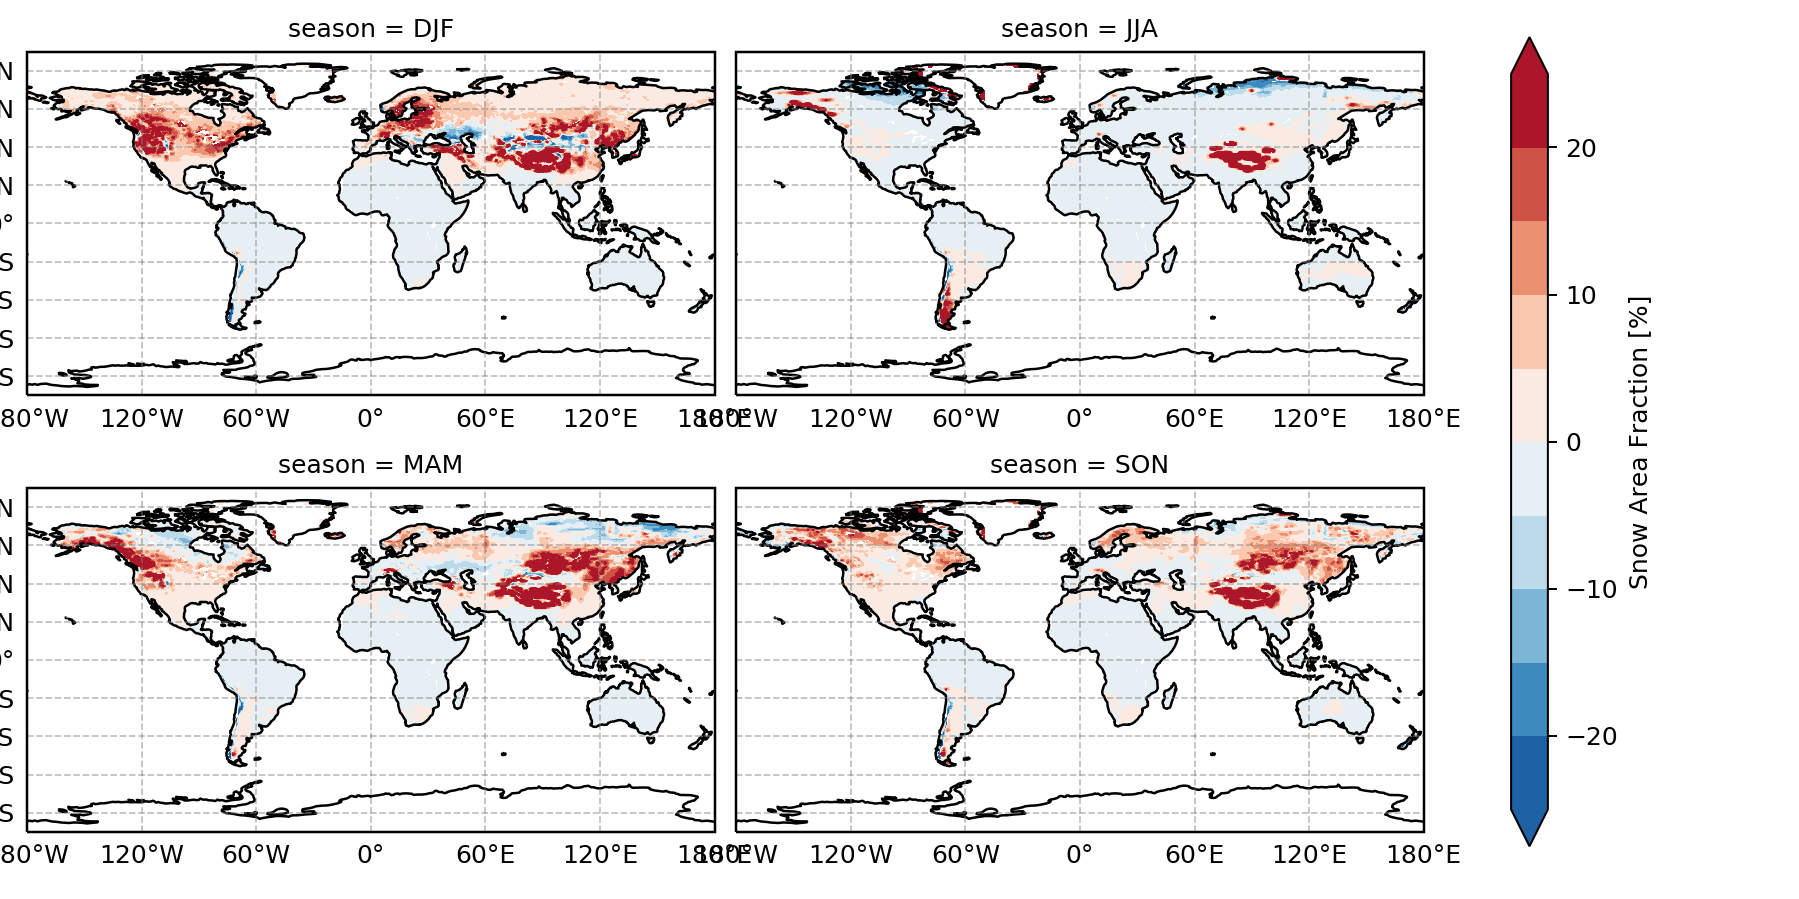

In [43]:
p = season_clim_bias.plot.contourf(col='season', col_wrap=2, levels=np.arange(-25,30,5), cmap='RdBu_r',
                                   subplot_kws={'projection': ccrs.PlateCarree()}, figsize=(10,5))

for i, ax in enumerate(p.axes.flat):
    ax.coastlines()
    ax.set_global()
#     ax.set_aspect('auto')

    # https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    if i in [1,3]: gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# plt.suptitle('Annual snow cover bias (IPSL-NCAR)')
# plt.savefig('IPSL_bias_NCEP.pdf', bbox_inches='tight')

## Rutgers university observations
It missing some data for both versions

In [5]:
iyr_obs=1967 # We do not use the first 3 months in the year 1966
fyr_obs=2018 # 2019 is not complete, so it is excluded
# sourceData='/data/mmenegoz/snow_investigations/nhsce_v01r01_19661004_20190930.nc'
sourceData='nhsce_v01r01_19661004_20190930.nc'

In [18]:
# iyr_obs=1967 # We do not use the first 3 months in the year 1966
# fyr_obs=2018 # 2019 is not complete, so it is excluded
# sourceData='nhsce_v01r01_19661004_20191104.nc'

In [19]:
# !ncdump -h /data/mmenegoz/snow_investigations/nhsce_v01r01_19661004_20190930.nc
!ncdump -h 'nhsce_v01r01_19661004_20190930.nc'

netcdf nhsce_v01r01_19661004_20190930 {
dimensions:
	cols = 88 ;
	rows = 88 ;
	time = UNLIMITED ; // (2765 currently)
variables:
	char coord_system ;
		coord_system:grid_mapping_name = "latitude_longitude" ;
		coord_system:longitude_of_central_meridian = 0. ;
		coord_system:semimajor_axis = 6378137 ;
		coord_system:semiminor_axis = 6356752.3 ;
	int time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1966-10-03" ;
		time:axis = "T" ;
		time:valid_range = 7, 19355 ;
		time:calendar = "gregorian" ;
	float snow_cover_threshold ;
		snow_cover_threshold:standard_name = "surface_snow_area_fraction" ;
		snow_cover_threshold:long_name = "threshold for the snow_cover_extent measurement" ;
		snow_cover_threshold:units = "1" ;
	double latitude(rows, cols) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude of cell center in half mesh grid, based on NOAA NMC Limited Area Fine Mesh Grid" ;
		latitude:units = "degrees_north" ;
		l

In [6]:
# ds = xr.open_dataset(sourceData).sel(time=slice('1967','2018'))
ds = xr.open_dataset(sourceData)
ds

<xarray.Dataset>
Dimensions:               (cols: 88, rows: 88, time: 2765)
Coordinates:
  * time                  (time) datetime64[ns] 1966-10-10 ... 2019-09-30
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 ...
    longitude             (rows, cols) float64 ...
Dimensions without coordinates: cols, rows
Data variables:
    coord_system          |S1 ...
    land                  (rows, cols) float32 ...
    area                  (rows, cols) float32 ...
    snow_cover_extent     (time, rows, cols) float32 ...
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, NOAA C...
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        nhsce_v01r01_19661004_20190930.nc
    naming_authority:          gov.noaa.ncdc
    metadata_link:             https://doi.org/10.7289/V5N014G9
    title:                     Climate Data Record (CDR) of No

In [7]:
with xr.set_options(keep_attrs=True):
    nhsce = ds.snow_cover_extent.where(ds.land == 1)*100
    
nhsce.attrs['units'] = '%'
nhsce

<xarray.DataArray 'snow_cover_extent' (time: 2765, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, n

<IPython.core.display.Javascript object>


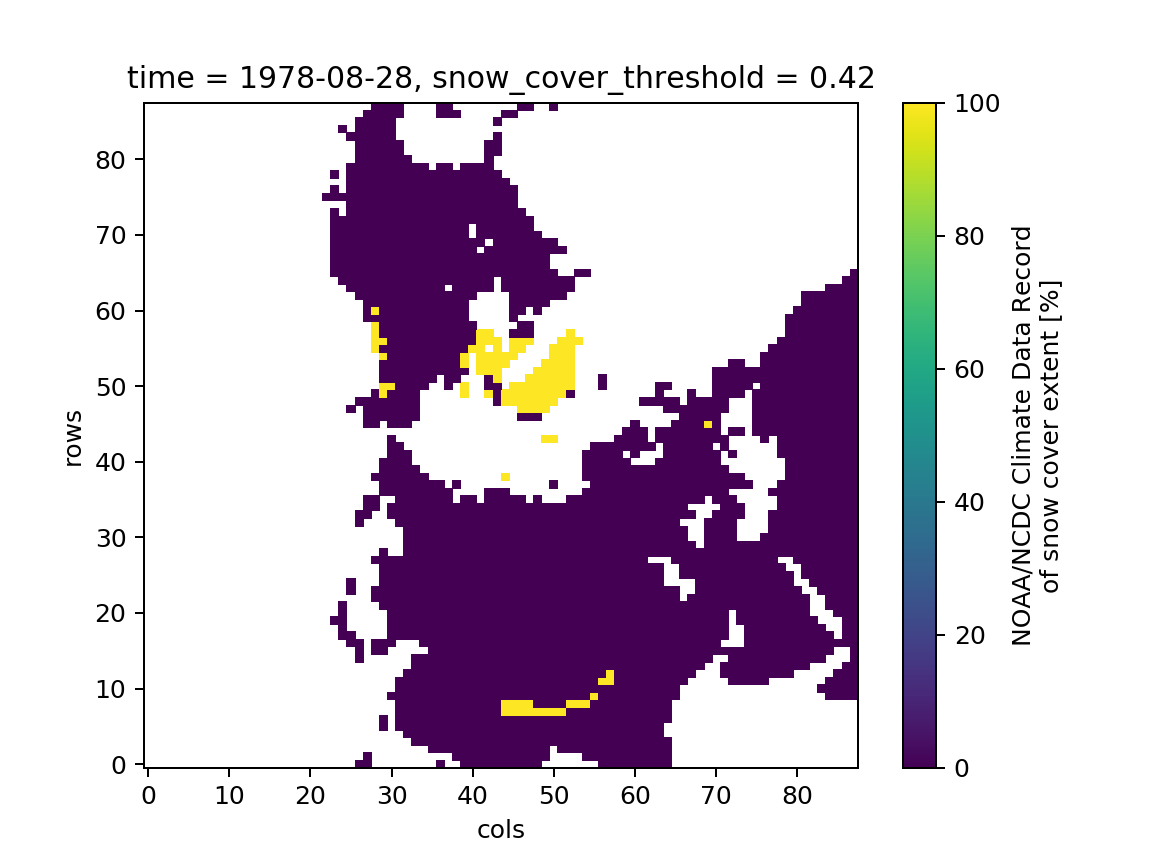

In [23]:
plt.figure()
nhsce[620].plot()

In [8]:
nhsce_mon = nhsce.resample(time='1MS').mean('time', skipna='False', keep_attrs=True)
nhsce_mon

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/resample.py:174: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'snow_cover_extent' (time: 636, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, na

### Some missing data ?

Missing data index 
- [139-160[ (1969-06-09 to 1969-11-03)
- [248-260[ (1971-07-12 to 1971-10-04)

https://climate.rutgers.edu/snowcover/table_area.php?ui_set=0&ui_sort=0

<IPython.core.display.Javascript object>


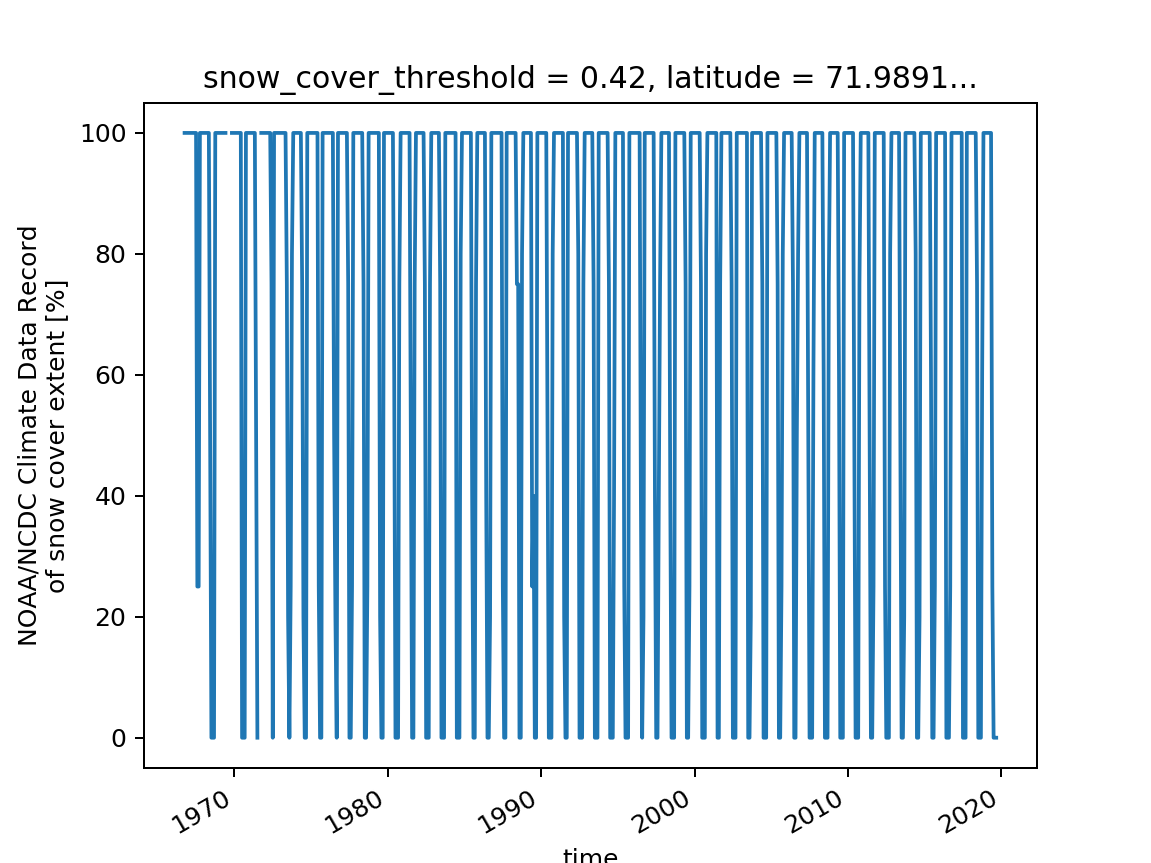

In [52]:
plt.figure()
nhsce_mon[:,37,36].plot()
plt.show()

<IPython.core.display.Javascript object>


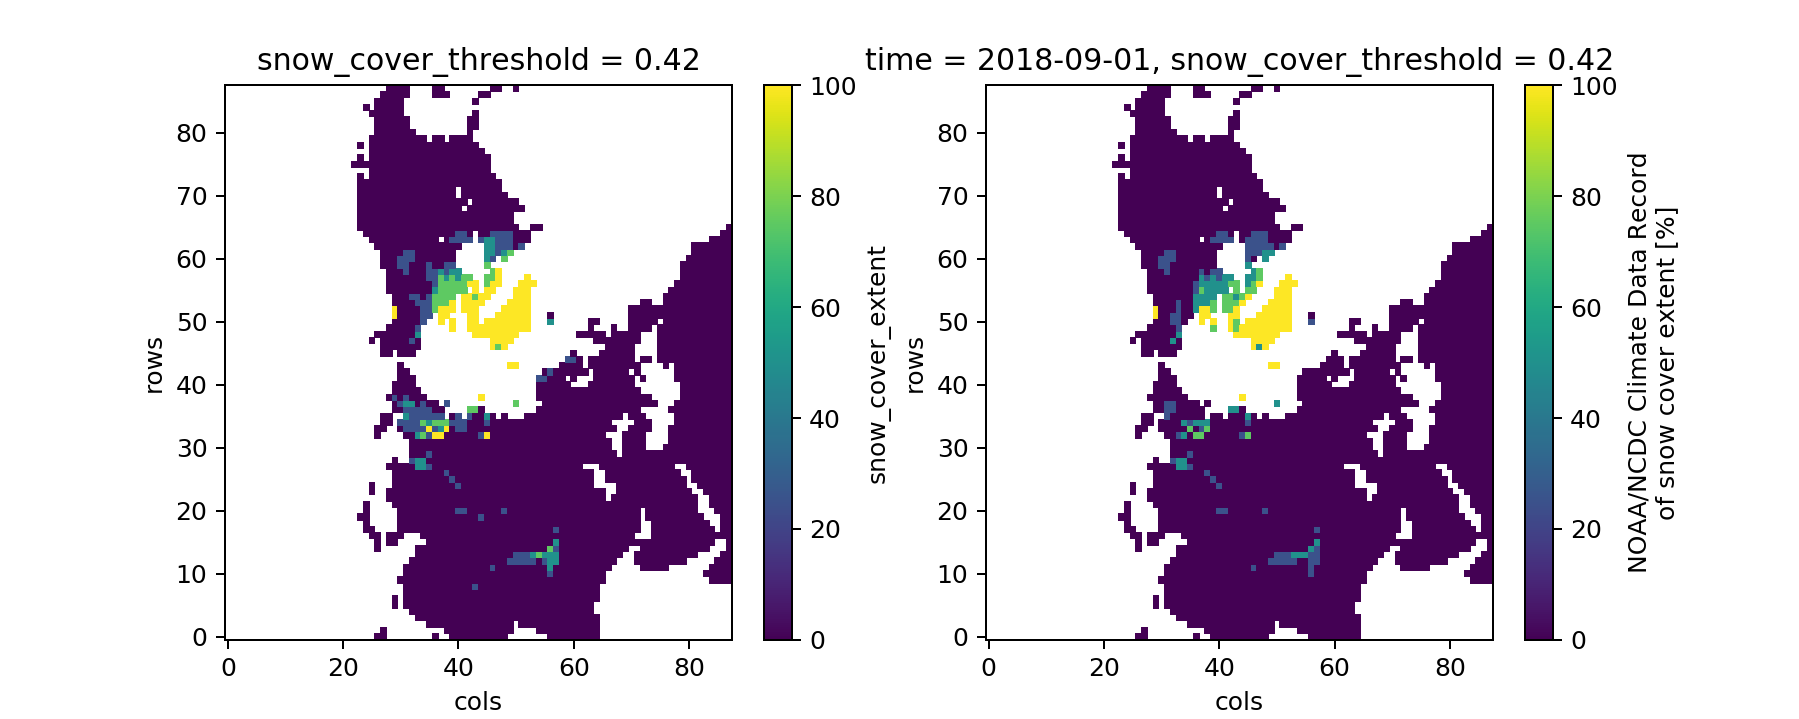

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [56]:
plt.figure(figsize=(10,4))
plt.subplot(121)
nhsce.isel(time=slice(2708+1,2712+1)).mean('time').plot()
plt.subplot(122)
nhsce_mon.sel(time=slice('1967','2018'))[620].plot()

### Regrid to the IPSL grid

<IPython.core.display.Javascript object>


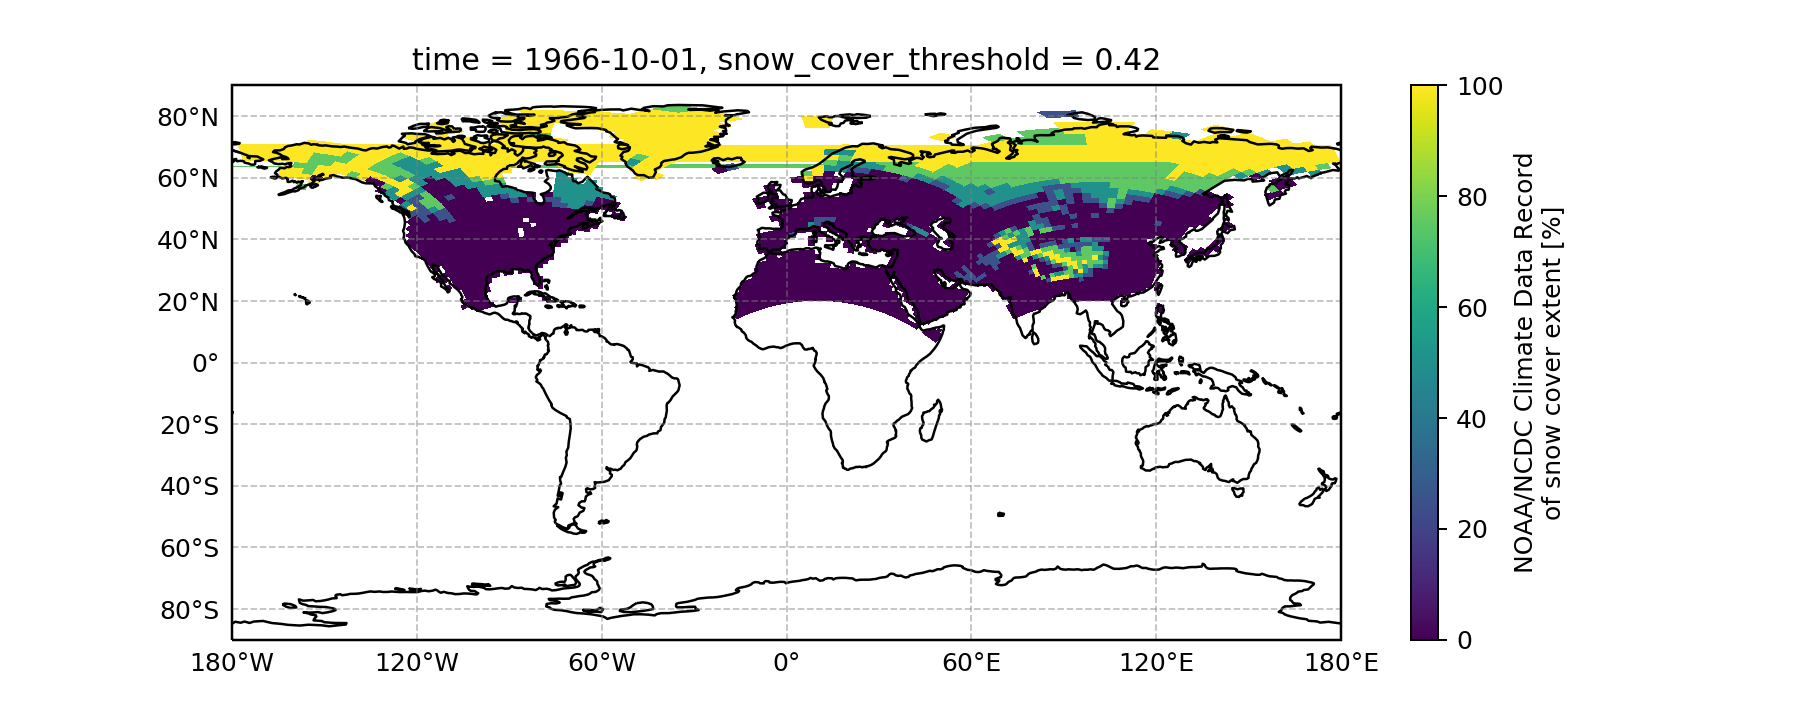

In [26]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

nhsce_mon[0].plot(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

We need to rename the coordinate names to lon and lat because xESMF has no way to guess variable meaning. + we select the same time period as the IPSL data

In [9]:
nhsce_mon = nhsce_mon.rename({'longitude': 'lon', 'latitude': 'lat'}).sel(time=slice('1984','2014'))
nhsce_mon

<xarray.DataArray 'snow_cover_extent' (time: 372, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, na

### Value of cells in the new grid that are outside the old grid's domain #15
https://github.com/JiaweiZhuang/xESMF/issues/15

In [10]:
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

In [11]:
regridder = xe.Regridder(nhsce_mon, snc_ipsl, 'bilinear', periodic=False)
regridder = add_matrix_NaNs(regridder)
regridder

Overwrite existing file: bilinear_88x88_143x144.nc 
 You can set reuse_weights=True to save computing time.


/home/mlalande/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_88x88_143x144.nc 
Reuse pre-computed weights? False 
Input grid shape:           (88, 88) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [12]:
nhsce_mon_144x143 =  regridder(nhsce_mon)
nhsce_mon_144x143

<xarray.DataArray 'snow_cover_extent' (time: 372, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, na

<IPython.core.display.Javascript object>


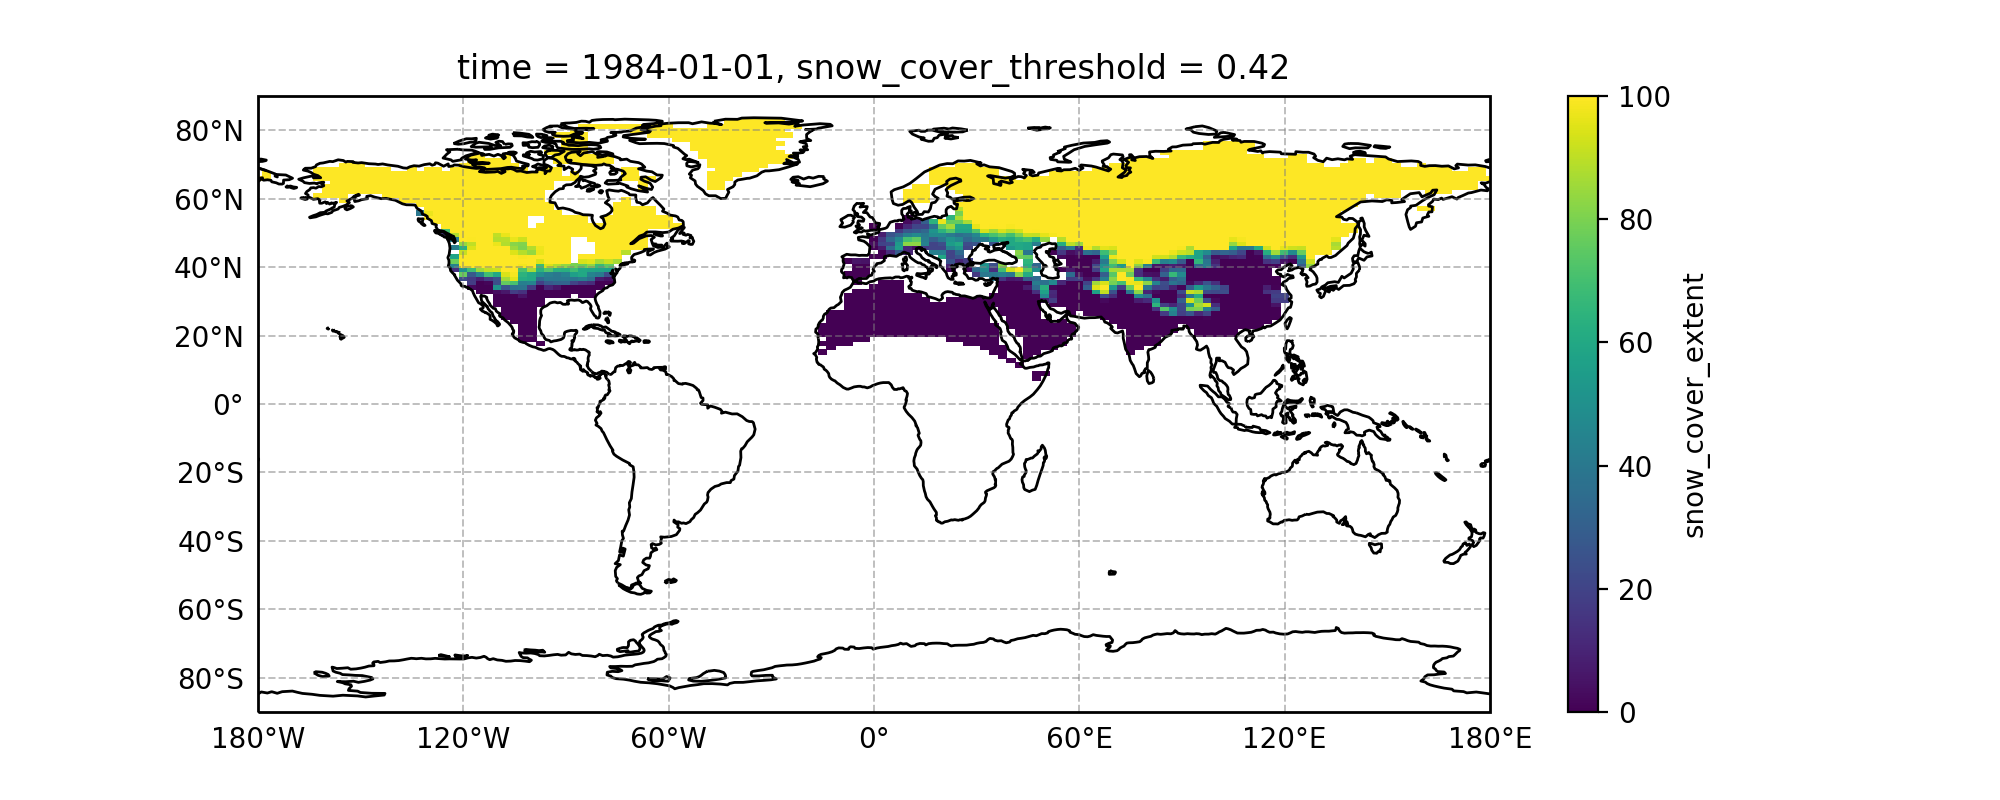

In [13]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

nhsce_mon_144x143[0].plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [14]:
clim_diff = clim_ipsl - u.clim(nhsce_mon_144x143)

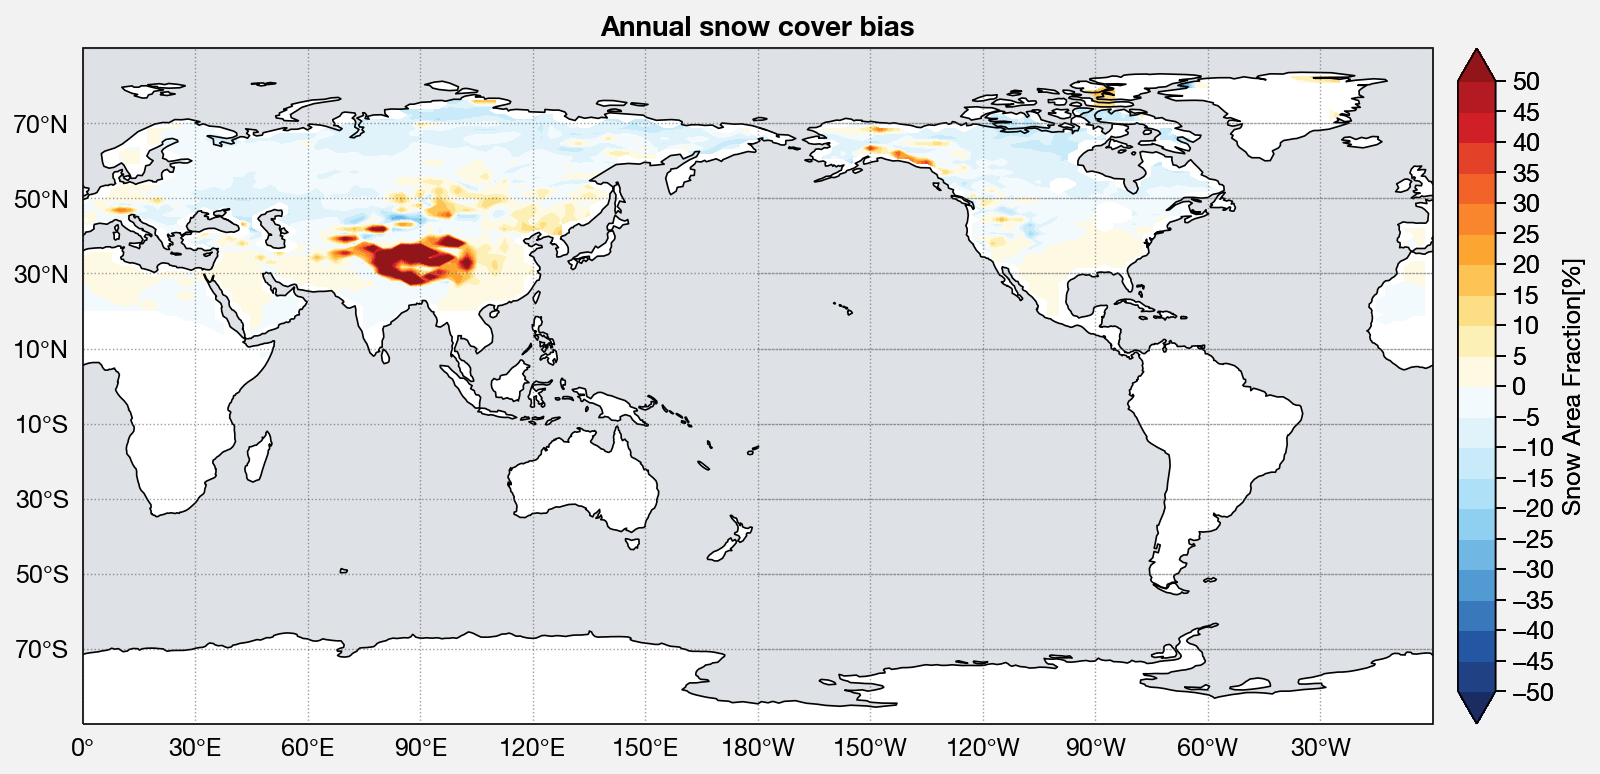

In [28]:
import proplot as plot
%matplotlib inline

f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=8)

m = axs[0].contourf(clim_diff, cmap='ColdHot', levels=np.arange(-50,55,5), extend='both')

f.colorbar(m, label=clim_ipsl.long_name + "["+clim_ipsl.units+"]")

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3',
    suptitle="Annual snow cover bias"
)

In [29]:
season_clim_rutgers = u.season_clim(nhsce_mon_144x143)
season_clim_ipsl = u.season_clim(snc_ipsl)
season_clim_diff = season_clim_ipsl - season_clim_rutgers
season_clim_diff

<xarray.DataArray (season: 4, lat: 143, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
    

In [38]:
# season_clim_diff.to_netcdf('proplot_issues/season_clim_diff.nc')

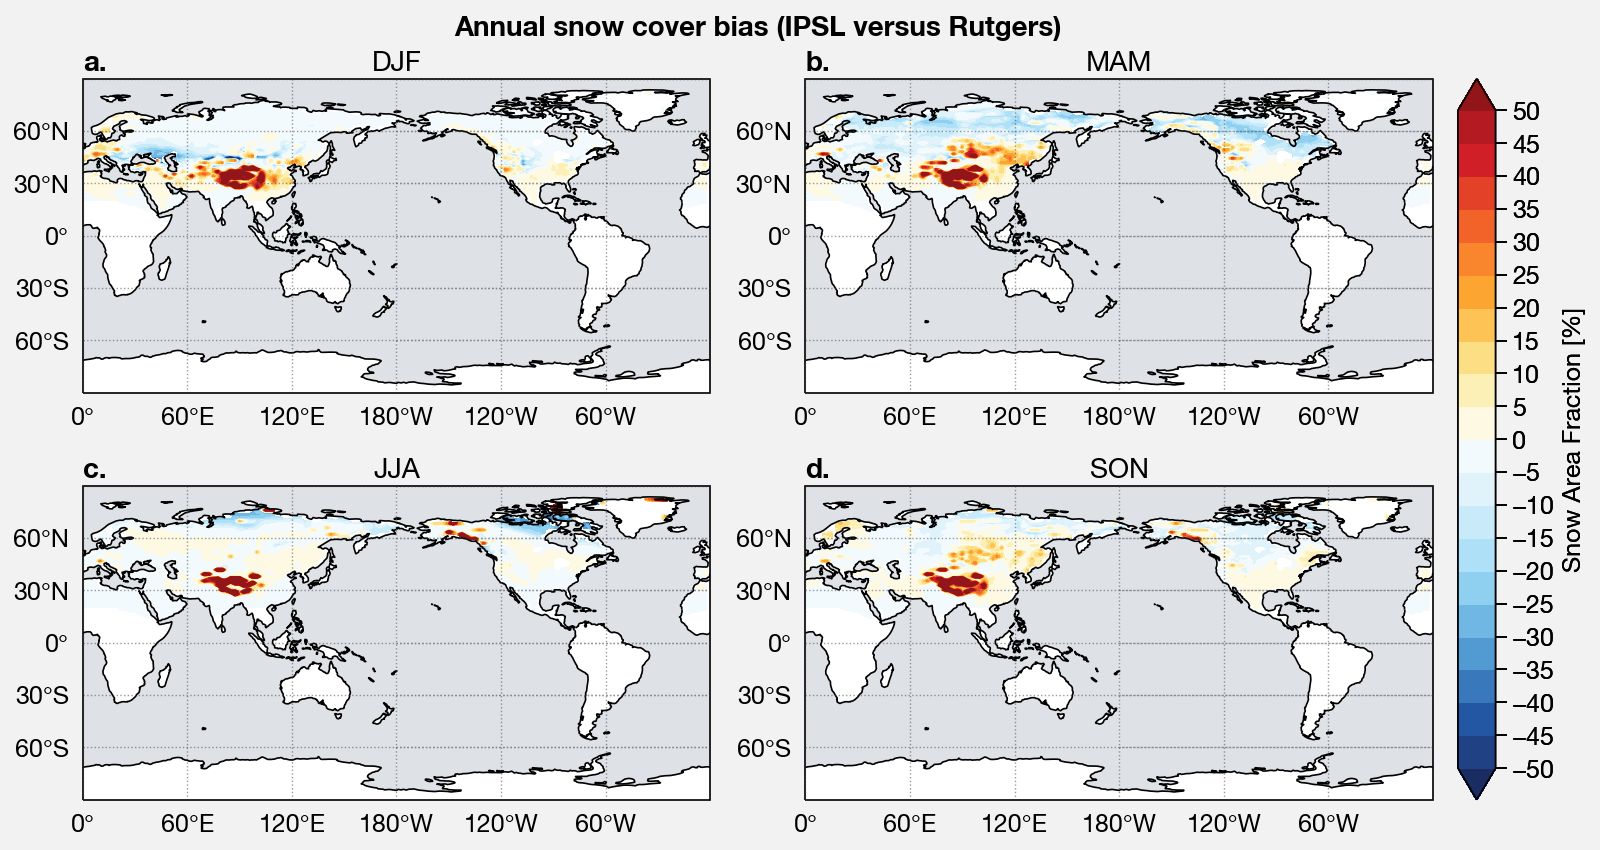

In [31]:
f, axs = plot.subplots(
    proj='cyl', proj_kw={'lon_0':180},
    ncols=2, nrows=2, width=8, share=3 # (https://github.com/lukelbd/proplot/issues/79)
)

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i, ax in enumerate(axs):
    m = ax.contourf(
        season_clim_diff.sel(season=seasons[i]), 
        cmap='ColdHot', levels=np.arange(-50,55,5), extend='both'
    )
    ax.format(title=season_clim_diff.sel(season=seasons[i]).season.values)
    
f.colorbar(m, label=clim_ipsl.long_name + " ["+clim_ipsl.units+"]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, ocean=True, oceancolor='gray3',
           suptitle="Annual snow cover bias (IPSL versus Rutgers)",
           lonlines=60, latlines=30, abc=True, abcstyle='a.'
          )